In [156]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import arviz as az

# Datele de intrare
k = 180    # Numărul total de apeluri observate
T = 10     # Intervalul de timp în ore

In [157]:
# Parametrii distribuției Gamma a priori
alpha_prior = 1
beta_prior = 1/16

# Definim gama de valori pentru λ (rata medie de apeluri pe oră)
lambda_values = np.linspace(0.001, 30, 1000)  # Evităm zero pentru stabilitate numerică

# Funcția densitate a priori gamma
prior_pdf = stats.gamma.pdf(
    lambda_values, 
    a=alpha_prior,
    scale=1/beta_prior)

posterior_pdf este funcția Bayes
$$
P(\lambda | k, T) = \frac{P(k,T|\lambda) \cdot P(\lambda)}{P(k,T)}
$$

In [158]:
likelihood = stats.poisson.pmf(k, mu=T * lambda_values)

posterior_pdf = prior_pdf * likelihood / np.trapz(prior_pdf * likelihood, lambda_values)

mean_lambda = np.sum(lambda_values * posterior_pdf) / np.sum(posterior_pdf)

# Calculăm modulul a posteriori al lui λ (valoarea λ unde posteriorul atinge maximul)
mode_index = np.argmax(posterior_pdf)
mode_lambda = lambda_values[mode_index]

# Calculăm intervalul HDI de 94%
cumulative = np.cumsum(posterior_pdf) * (lambda_values[1] - lambda_values[0])
lower_idx = np.where(cumulative >= 0.03)[0][0]
upper_idx = np.where(cumulative <= 0.97)[0][-1]
lower_bound = lambda_values[lower_idx]
upper_bound = lambda_values[upper_idx]

Media a posteriori a lui λ: 17.9876
Modul a posteriori al lui λ: 17.8983


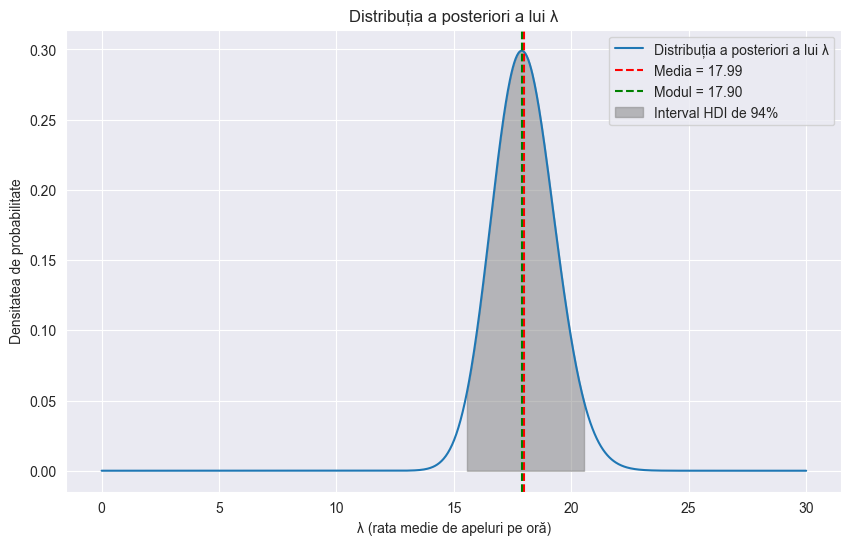

In [159]:
print(f"Media a posteriori a lui λ: {mean_lambda:.4f}")
print(f"Modul a posteriori al lui λ: {mode_lambda:.4f}")

# Vizualizarea distribuției a posteriori
plt.figure(figsize=(10, 6))
plt.plot(lambda_values, posterior_pdf, label='Distribuția a posteriori a lui λ')
plt.axvline(mean_lambda, color='r', linestyle='--', label=f'Media = {mean_lambda:.2f}')
plt.axvline(mode_lambda, color='g', linestyle='--', label=f'Modul = {mode_lambda:.2f}')
plt.title('Distribuția a posteriori a lui λ')
plt.fill_between(lambda_values, posterior_pdf, where=(lambda_values >= lower_bound) & (lambda_values <= upper_bound), color='gray', alpha=0.5, label='Interval HDI de 94%')
plt.xlabel('λ (rata medie de apeluri pe oră)')
plt.ylabel('Densitatea de probabilitate')
plt.legend()
plt.grid(True)
plt.show()